In [22]:
using Images, FileIO
using LinearAlgebra
using Plots

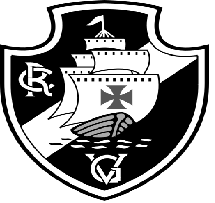

In [5]:
img = Gray.(load("vasco.png"))
img

In [11]:
A = convert(Array{Float64}, img)

203×215 Matrix{Float64}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [15]:
U,S,V = svd(A)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
203×203 Matrix{Float64}:
 -0.101486    0.0212945   -0.0108333    …  -0.13249     -1.66909e-12
 -0.0884785  -0.0281531   -0.0226867        0.058237     7.98764e-13
 -0.0810813  -0.0644511   -0.00515553      -0.027937    -2.93438e-13
 -0.0788484  -0.0781493    0.0234702        0.0666862    7.23076e-13
 -0.0883356  -0.0319754    0.0537899       -0.0323304   -1.67655e-13
 -0.0914555   0.00655238   0.0404578    …   0.0103716   -7.55631e-14
 -0.0943203   0.0308002    0.0172257        0.0062757    8.59163e-14
 -0.096166    0.041107     0.00144874      -0.0195167    6.41633e-14
 -0.100552    0.0394804   -0.00120433      -0.00261053  -4.33284e-13
 -0.0924829   0.0109834   -0.0201107        0.0829567    1.21182e-12
 -0.0834944  -0.0293695   -0.0240872    …  -0.0419281   -5.99646e-13
 -0.0789773  -0.0547223   -0.0141386        0.018932    -1.28247e-14
 -0.0752626  -0.0733363    0.00234824      -0.00744294   2.26632e-13
  ⋮                          

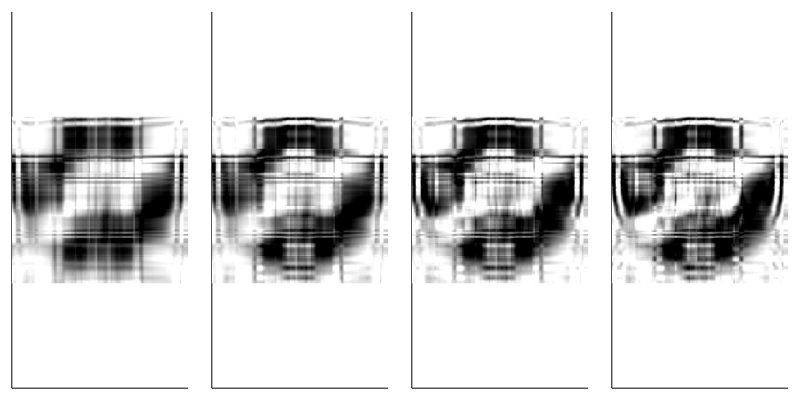

In [68]:
normPercent = []

p = plot(
    axis = nothing,
    layout = @layout([a b c d;]),
    size = (800,400)
)

for i=3:6
    normPercent = [normPercent; (norm(U[:,1:i]*diagm(S)[1:i,1:i]*V'[1:i, :])/norm(A))]
    plot!(p[i - 2], Gray.(U[:,1:i]*diagm(S)[1:i,1:i]*V'[1:i, :]), ratio=1)
end

p

In [69]:
normPercent

4-element Vector{Any}:
 0.9180000597932054
 0.9284278805511442
 0.9357918862888157
 0.9418341298165507

In [71]:
normPercent = []


for i=40:203
    normPercent = [normPercent; (norm(U[:,1:i]*diagm(S)[1:i,1:i]*V'[1:i, :])/norm(A))]
end


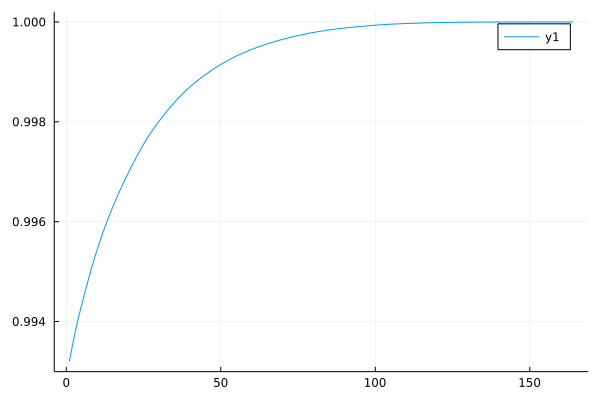

In [72]:
plot(normPercent)

In [73]:
normPercent

164-element Vector{Any}:
 0.9932002130581369
 0.9935176895484018
 0.9938208498611325
 0.9940912391831639
 0.9943371391959648
 0.9945755277322109
 0.9948067270973411
 0.9950276500529951
 0.995239441017868
 0.9954393176192641
 0.9956270912340867
 0.9958072034716317
 0.9959706443452873
 ⋮
 0.9999999760862974
 0.999999984134833
 0.999999989687057
 0.999999993498992
 0.9999999959873601
 0.9999999974802278
 0.9999999988678074
 0.999999999637494
 0.999999999875837
 0.9999999999871069
 1.0000000000000002
 1.0000000000000002

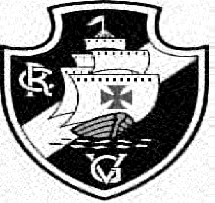

In [74]:
Gray.(U[:,1:40]*diagm(S)[1:40,1:40]*V'[1:40, :])